# **Simple Neural Network**

### In this notebook we will implement a simple neural network with one input layer of two neurons and one output layer with one neuron. 

---

## **I-Initialization**

In [1]:
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

In [2]:
def initialisation(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(X, parameters:dict)->dict:
    """
    Forward propagation of the neural network
    """
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    # First layer
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)
    # Second layer
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    
    activations = {"A1": A1,
                   "A2": A2}
    return activations

In [4]:
def backward_propagation(X, y, parameters:dict, activations:dict)->dict:
    """
    Backward propagation of the neural network
    """
    A1 = activations["A1"]
    A2 = activations["A2"]
    W2 = parameters["W2"]
    
    m = y.shape[1]
    
    # Second layer
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)
    # First layer
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dW1": dW1,
                 "dW2": dW2,
                 "db1": db1,
                 "db2": db2}
    return gradients

In [5]:
def update_parameters(parameters:dict, gradients:dict, learning_rate:float)->dict:
    """
    Update the parameters of the neural network
    """
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    dW1 = gradients["dW1"]
    dW2 = gradients["dW2"]
    db1 = gradients["db1"]
    db2 = gradients["db2"]
    
    # Update
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "W2": W2,
                  "b1": b1,
                  "b2": b2}
    return parameters

In [6]:

def predict(X, parameters:dict)->np.ndarray:
    """
    Predict the output of the neural network
    """
    activations = forward_propagation(X, parameters)
    A2 = activations["A2"]
    return A2>=0.5

In [7]:
def log_loss(A, y, eps=1e-15):
    return 1 / len(y) * np.sum(-y * np.log(A + eps) - (1 - y) * np.log(1 - A + eps))

def neural_network(X_train, y_train, nbr_hidden:int=32, nbr_iteration:int=1000, learning_rate:float=0.1)->dict:
    """
    Neural network
    """
    nbr_input = X_train.shape[0]
    nbr_output = y_train.shape[0]
    
    parameters = initialisation(nbr_input, nbr_hidden, nbr_output)
    
    train_loss = []
    train_accuracy = []
    
    for i in tqdm(range(nbr_iteration)):
        activations = forward_propagation(X_train, parameters)
        gradients = backward_propagation(X_train, y_train, parameters, activations)
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        if i%10 == 0:
            train_loss.append(log_loss(y_train, activations["A2"]))
            y_pred = predict(X_train, parameters)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_accuracy.append(current_accuracy)
            
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='train acc')
    plt.legend()
    
    plt.show()
        
    return parameters

Dimension of X: (2, 100)
Dimension of y: (1, 100)


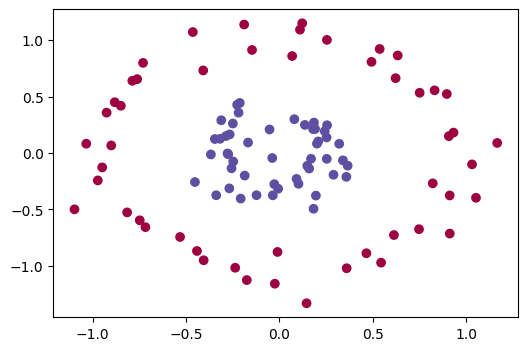

In [8]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print("Dimension of X:", X.shape)
print("Dimension of y:", y.shape)

plt.figure(figsize=(6, 4))
plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 2247.53it/s]


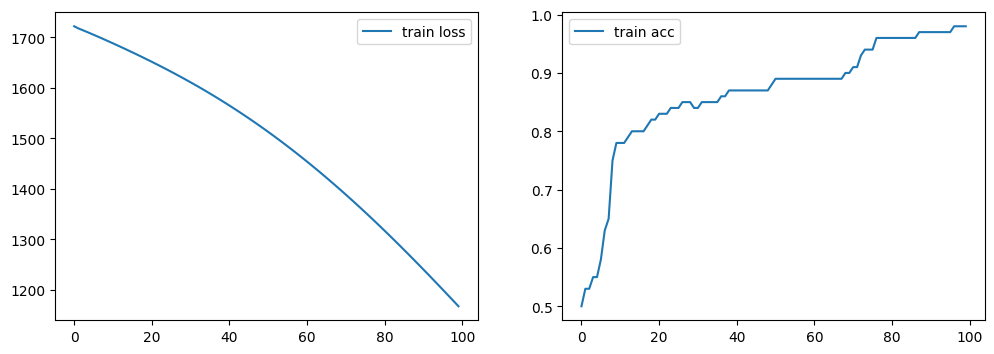

In [9]:
parametres = neural_network(X, y)